Complete all the following questions: -

1. Gather and prepare data: Gather and prepare the data you will use to train the model. This may involve collecting data from various sources, do EDA, cleaning and formatting the data, feature selection, encoding, and splitting it into training, validation, and testing sets.

2. Check distribution of the data, outliers and missing value treatment.

3. Choose a model: Use AdaBoost Algorithm.

4. Train the model: You'll need to train it using the data you collected and prepared in step 2. This involves feeding the data into the model and adjusting the model's parameters until it produces accurate results.

5. Evaluate the model: After training the model, you'll need to evaluate its performance using the validation and testing sets. This will help you determine how well the model is able to generalize to new data and whether it is overfitting or underfitting.

6. Fine-tune the model: Based on the results of the evaluation, you may need to fine-tune the model by adjusting the model's parameters, selecting different features, or using a different model architecture.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [5]:
df.nunique()

Bankrupt?                                                      2
 ROA(C) before interest and depreciation before interest    3333
 ROA(A) before interest and % after tax                     3151
 ROA(B) before interest and depreciation after tax          3160
 Operating Gross Margin                                     3781
                                                            ... 
 Liability to Equity                                        6819
 Degree of Financial Leverage (DFL)                         6240
 Interest Coverage Ratio (Interest expense to EBIT)         6240
 Net Income Flag                                               1
 Equity to Liability                                        6819
Length: 96, dtype: int64

In [6]:
df.corr()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
x = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel

# Initialize an AdaBoost classifier
adaboost = AdaBoostClassifier()

# Train the AdaBoost model
adaboost.fit(x, y)

# Perform feature selection using feature importance
feature_importances = adaboost.feature_importances_
selector = SelectFromModel(adaboost, threshold='median')
x_new = selector.fit_transform(x, y)

# Get the selected feature names
selected_feature_names = x.columns[selector.get_support(indices=True)].tolist()

# Print the selected features
print("Selected features: ", selected_feature_names)

Selected features:  [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit 

In [9]:
len(selected_feature_names)

95

<BarContainer object of 95 artists>

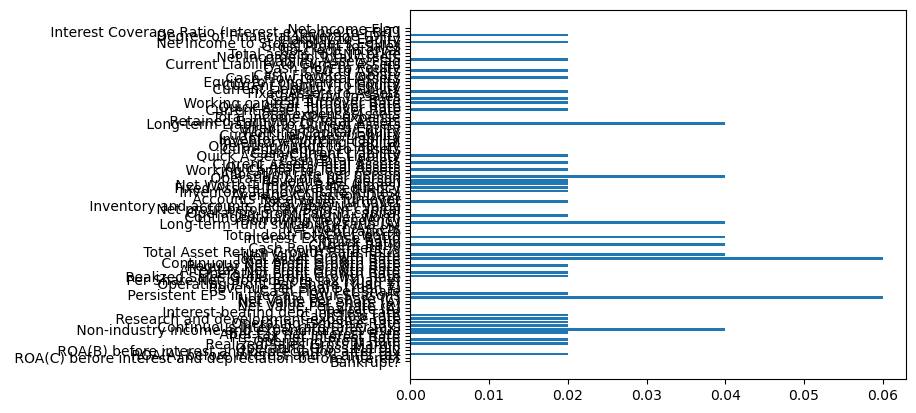

In [10]:
plt.barh(df.columns[0:95],feature_importances)

In [11]:
new_features = []
j=-1
for i in selected_feature_names:
    j=j+1
    if feature_importances[j]>0:
        new_features.append(i) 

In [12]:
new_features

[' ROA(B) before interest and depreciation after tax',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Net Value Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Quick Ratio',
 ' Total debt/Total net worth',
 ' Borrowing dependency',
 ' Operating profit/Paid-in capital',
 ' Accounts Receivable Turnover',
 ' Fixed Assets Turnover Frequency',
 ' Net Worth Turnover Rate (times)',
 ' Revenue per person',
 ' Operating profit per person',
 ' Allocation rate per person',
 ' Quick Assets/Total Assets',
 ' Cash/Total Assets',
 ' Cash/Current Liability',
 ' Retained Earnings t

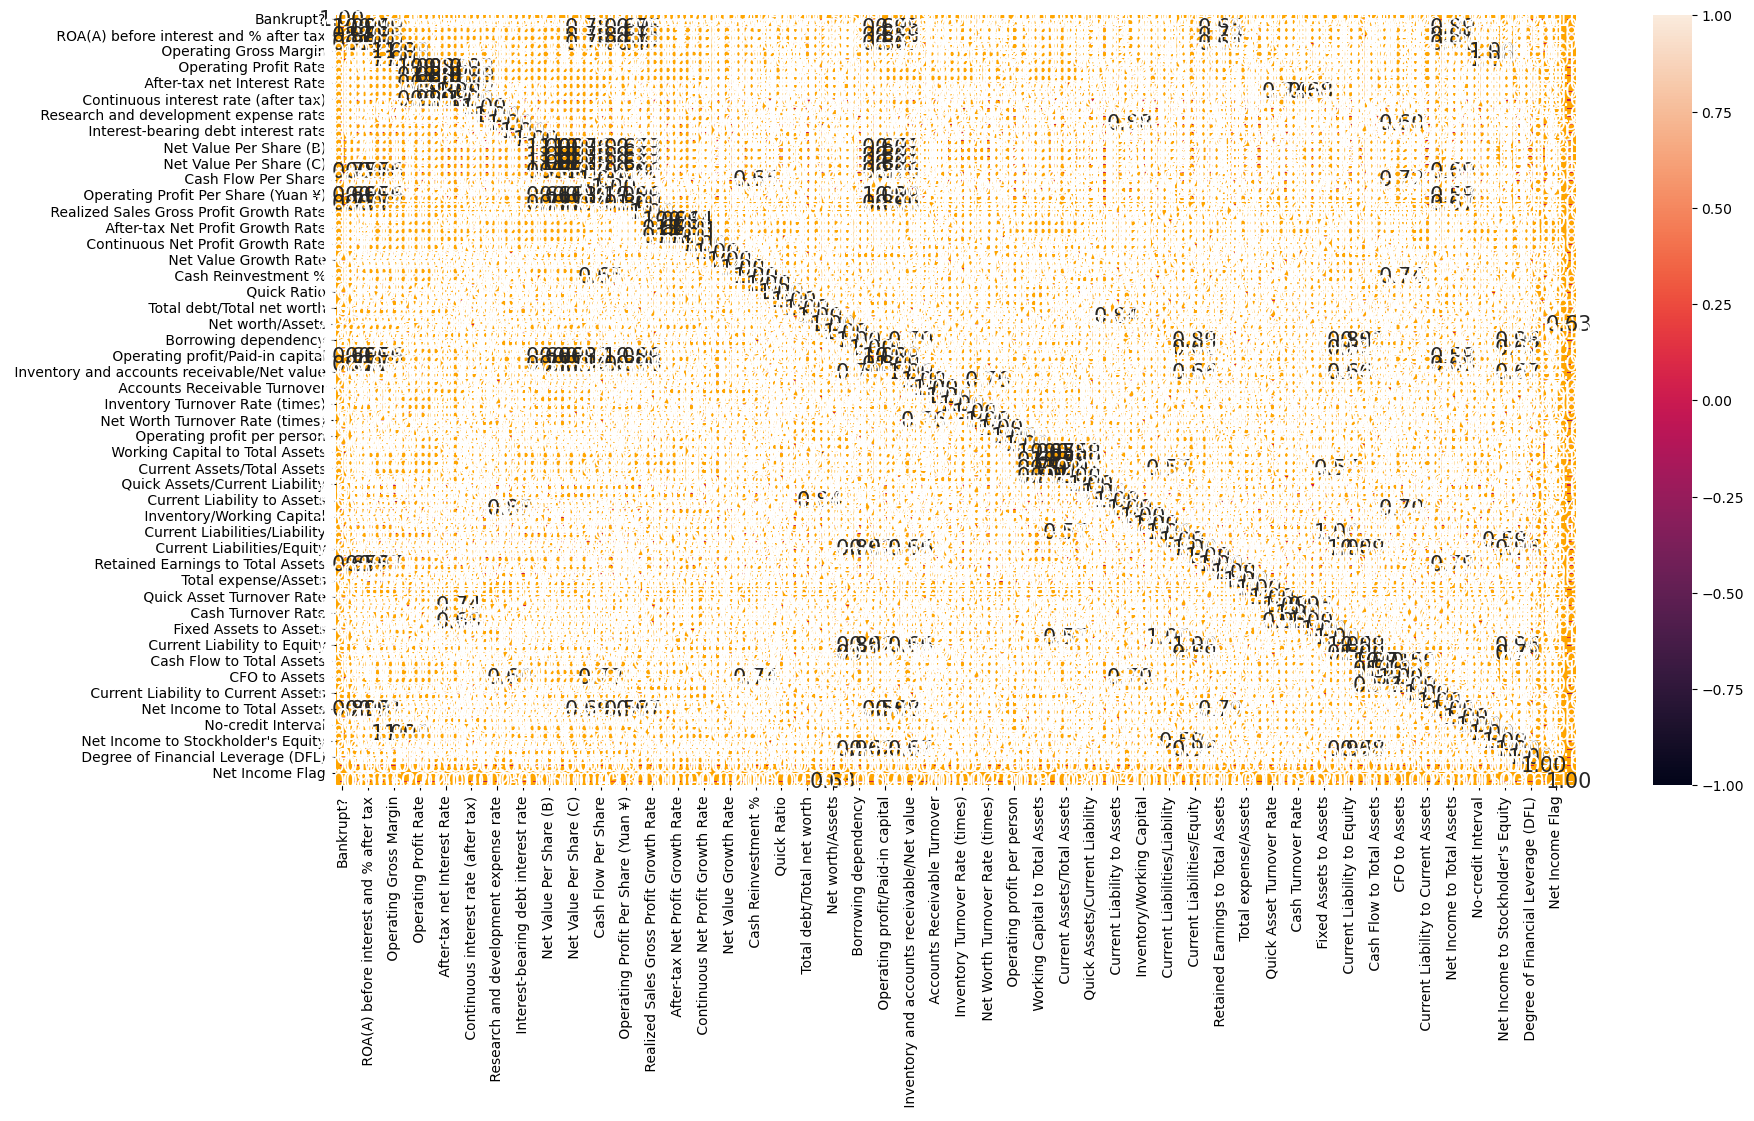

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange')
plt.show()

In [14]:
len(new_features)

39

In [15]:
new_x = df[np.array(new_features)]
new_x.head(2)

,ROA(B) before interest and depreciation after tax,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Persistent EPS in the Last Four Seasons,...,Retained Earnings to Total Assets,Quick Asset Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Current Liability to Liability,Cash Flow to Liability,Cash Flow to Equity,Net Income to Total Assets,Liability to Equity,Interest Coverage Ratio (Interest expense to EBIT)
0,0.40575,0.998969,0.796887,0.302646,0.780985,0.000126,0.0,0.458143,0.000725,0.169141,...,0.903225,6.550000e+09,4.580000e+08,0.671568,0.676269,0.458609,0.312905,0.716845,0.290202,0.564050
1,0.51673,0.998946,0.797380,0.303556,0.781506,0.000290,0.0,0.461867,0.000647,0.208944,...,0.931065,7.700000e+09,2.490000e+09,0.671570,0.308589,0.459001,0.314163,0.795297,0.283846,0.570175


In [16]:
new_df = new_x.copy()
new_df["Bankrupt?"] = df["Bankrupt?"]
new_df.head(2)

,ROA(B) before interest and depreciation after tax,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Persistent EPS in the Last Four Seasons,...,Quick Asset Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Current Liability to Liability,Cash Flow to Liability,Cash Flow to Equity,Net Income to Total Assets,Liability to Equity,Interest Coverage Ratio (Interest expense to EBIT),Bankrupt?
0,0.40575,0.998969,0.796887,0.302646,0.780985,0.000126,0.0,0.458143,0.000725,0.169141,...,6.550000e+09,4.580000e+08,0.671568,0.676269,0.458609,0.312905,0.716845,0.290202,0.564050,1
1,0.51673,0.998946,0.797380,0.303556,0.781506,0.000290,0.0,0.461867,0.000647,0.208944,...,7.700000e+09,2.490000e+09,0.671570,0.308589,0.459001,0.314163,0.795297,0.283846,0.570175,1


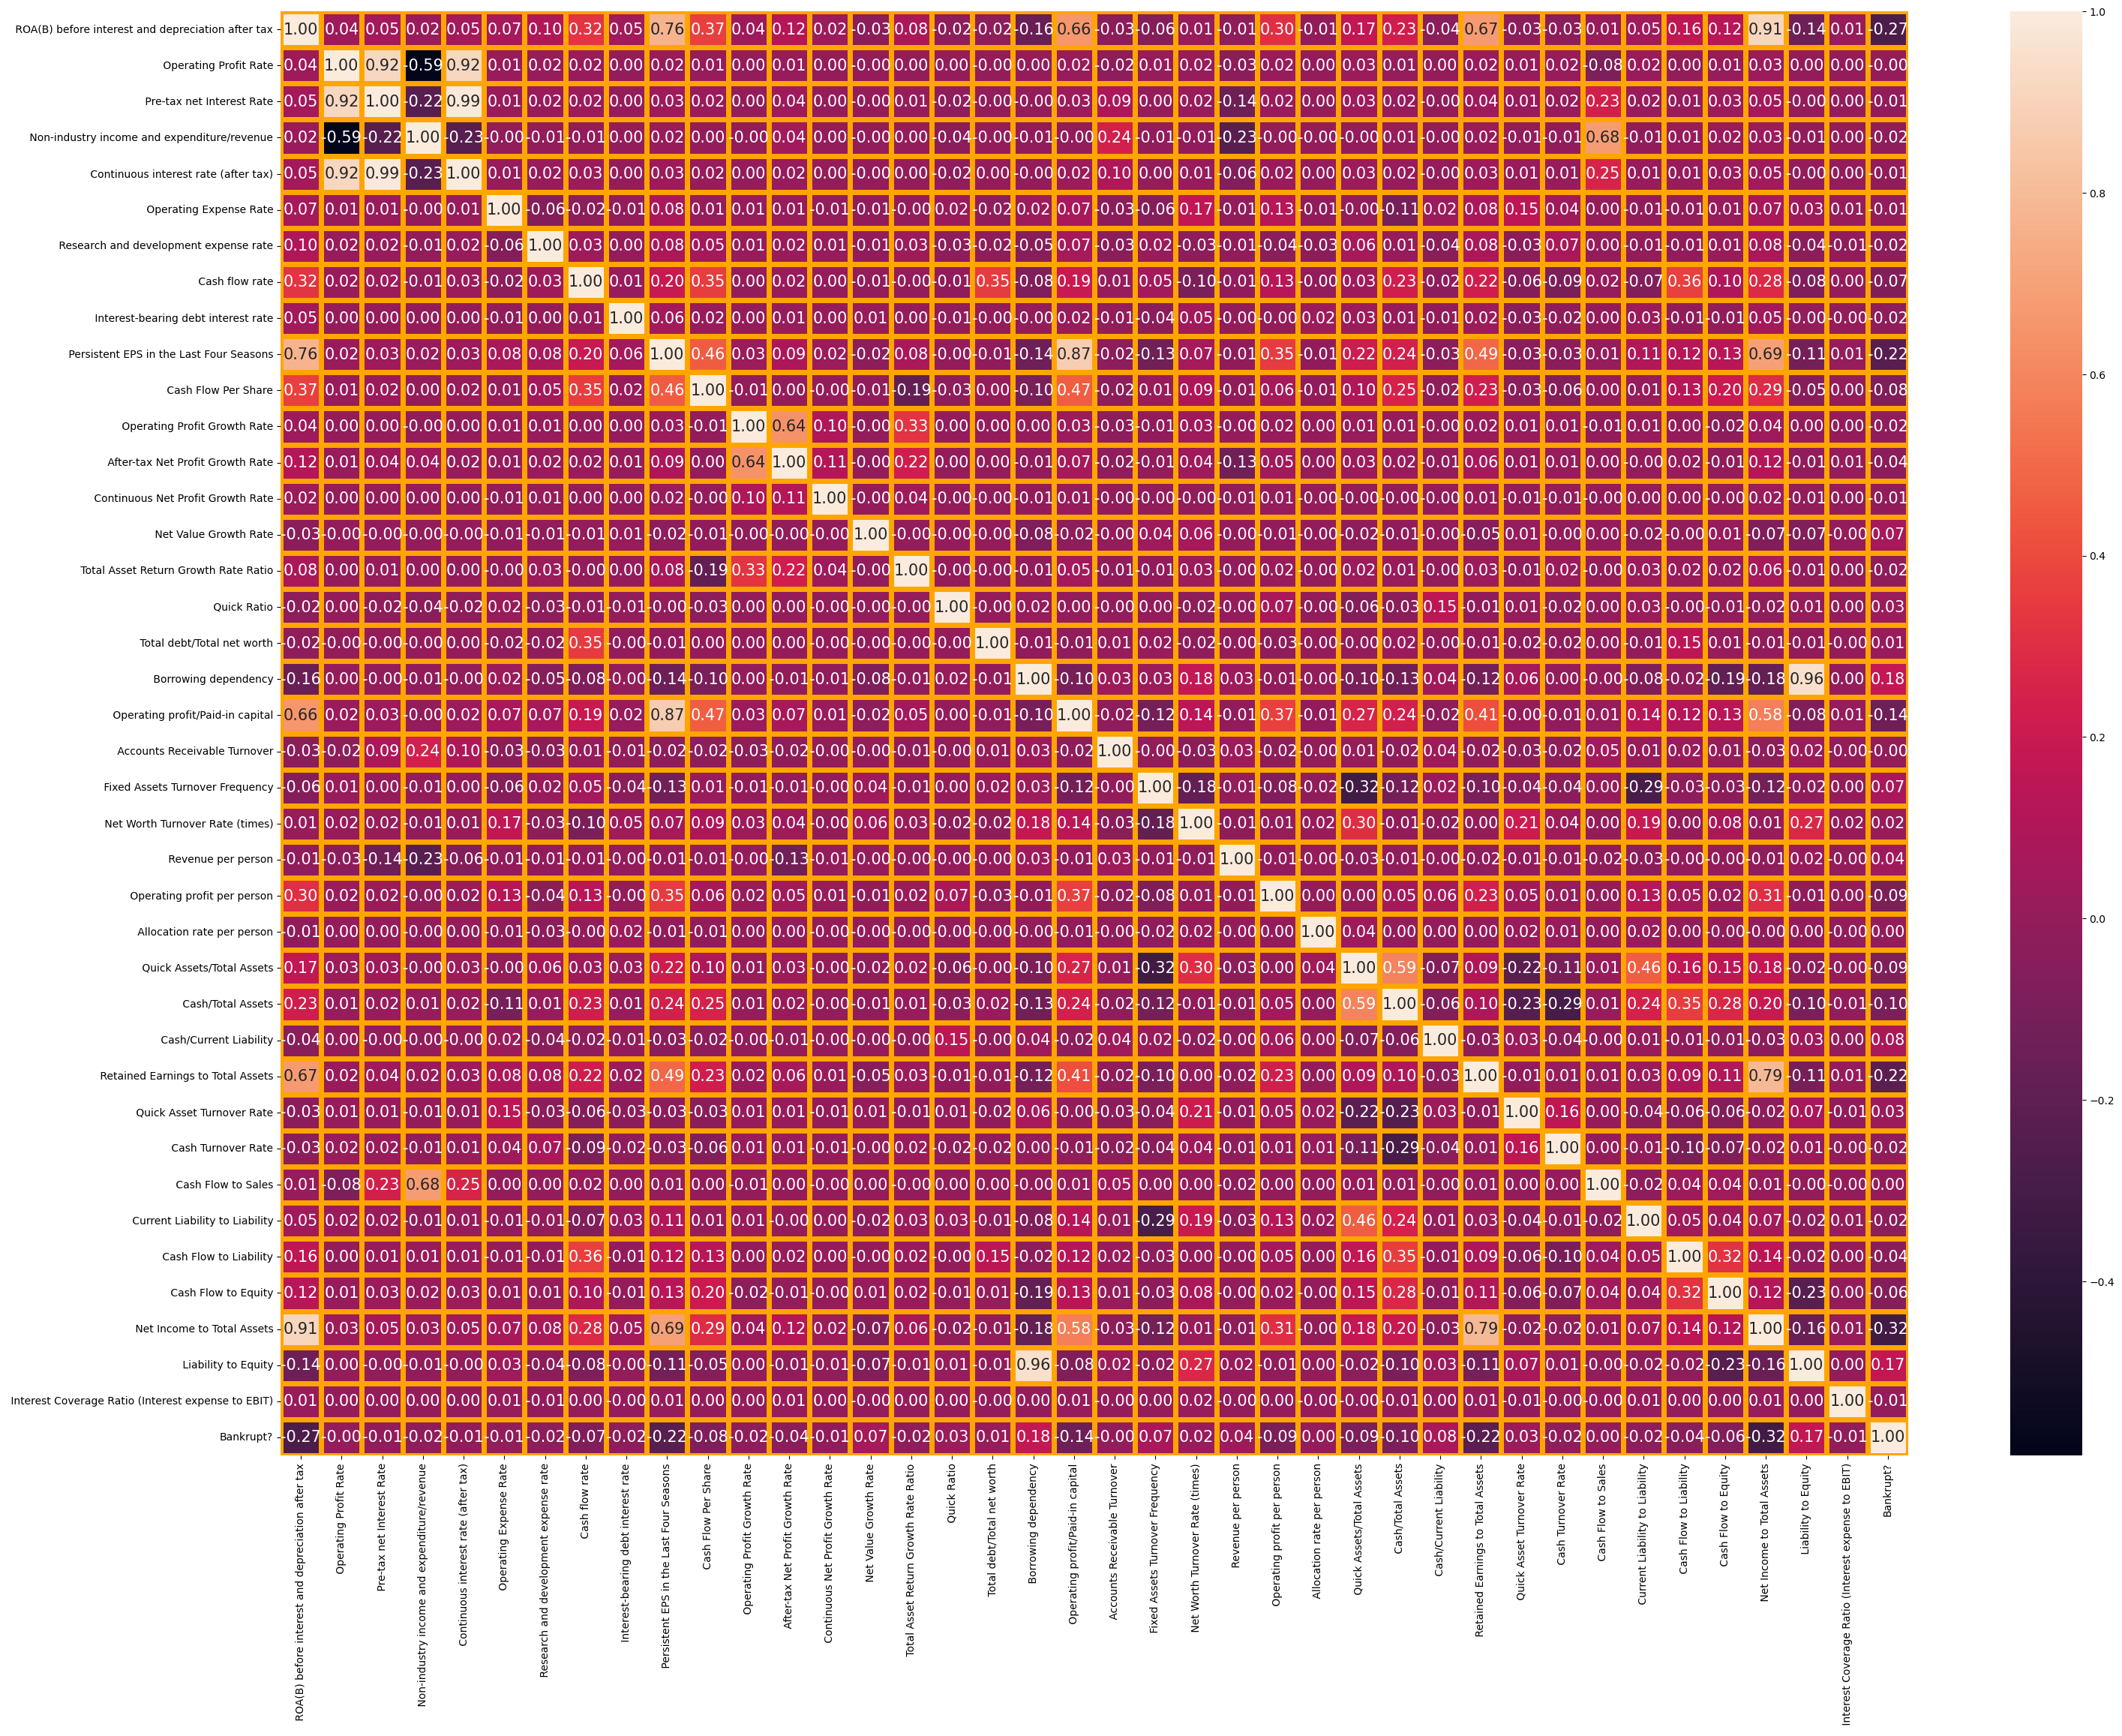

In [17]:
plt.figure(figsize=(35,25))
sns.heatmap(new_df.corr(), annot=True, fmt=".2f", annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange')
plt.show()

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 40 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0    ROA(B) before interest and depreciation after tax   6819 non-null   float64
 1    Operating Profit Rate                               6819 non-null   float64
 2    Pre-tax net Interest Rate                           6819 non-null   float64
 3    Non-industry income and expenditure/revenue         6819 non-null   float64
 4    Continuous interest rate (after tax)                6819 non-null   float64
 5    Operating Expense Rate                              6819 non-null   float64
 6    Research and development expense rate               6819 non-null   float64
 7    Cash flow rate                                      6819 non-null   float64
 8    Interest-bearing debt interest rate                 6819 non-null  

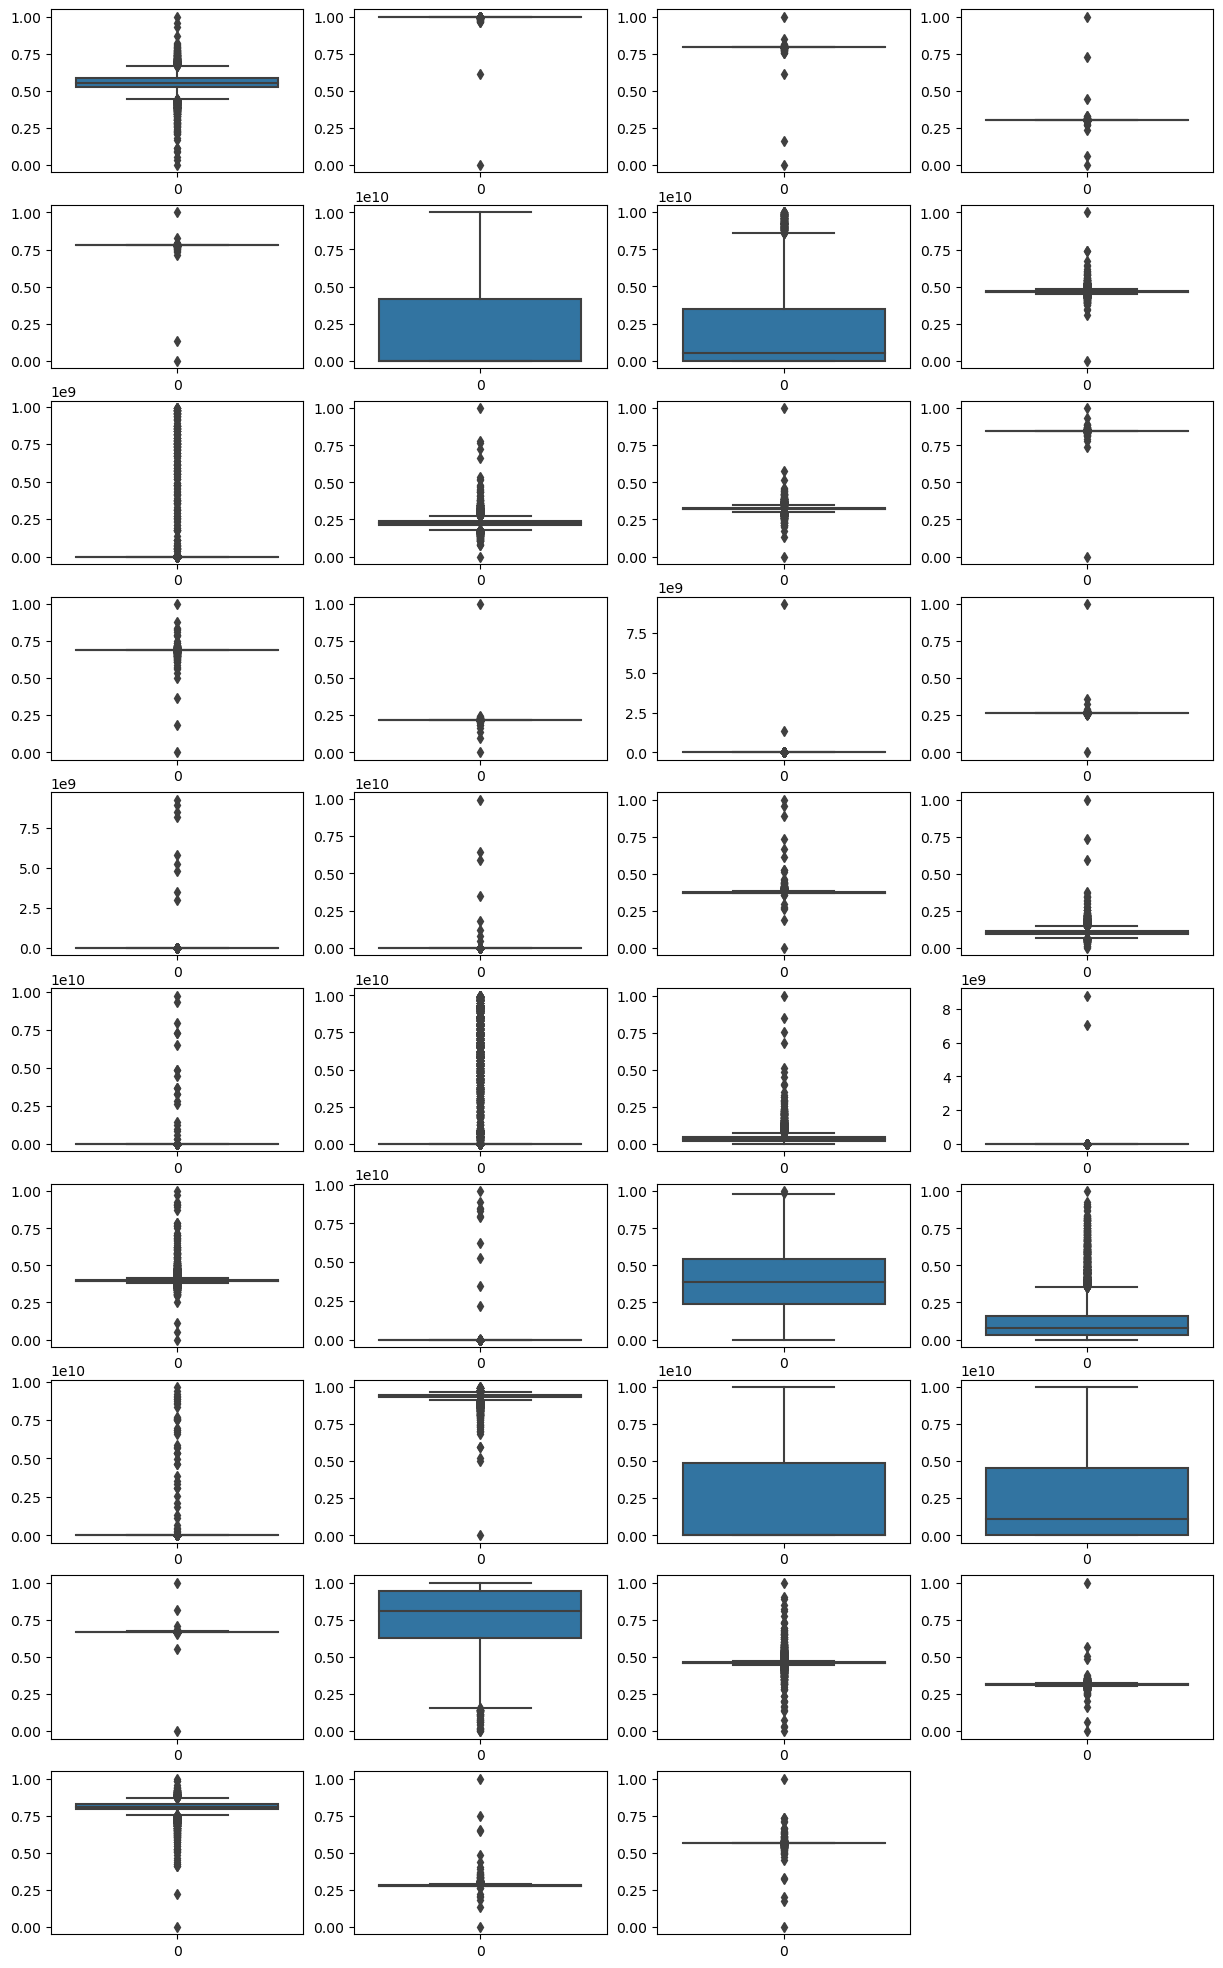

In [22]:
#check for outliers

plt.figure(figsize=(15,25))
x=1
for i in new_x.columns:
    plt.subplot(10,4,x)
    sns.boxplot(new_df[i])
    x+=1
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.25, random_state=12)

In [24]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [25]:
clf.score(x_train,y_train)

0.9814235432147047

In [26]:
clf.score(x_test,y_test)

0.9683284457478006

In [27]:
from sklearn.metrics import classification_report
y_pred = clf.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1680
           1       0.20      0.40      0.27        25

    accuracy                           0.97      1705
   macro avg       0.60      0.69      0.63      1705
weighted avg       0.98      0.97      0.97      1705



**Hyperparameter Tuning**

In [28]:
# Define the AdaBoost classifier
adaboost = AdaBoostClassifier()
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.1, 0.5, 1.0],  # Learning rate
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(adaboost, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy: ", test_accuracy)

Best Hyperparameters:  {'learning_rate': 0.1, 'n_estimators': 200}
Best Score:  0.9687135224475039
Test Accuracy:  0.9730205278592375
